<a href="https://colab.research.google.com/github/rodriguessdeyson/feature-comparison/blob/master-artefacts/Fault_Detection_and_Feature_Selection_Comparison_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seleção de features dados estatísticos
Nesta etapa, dois arquivos são carregados com features obtidas dos dados puros de vibração. Esta etapa realiza a compração de dois conjuntos de features comumente extraídas de dados de vibração em comparação com as feature da biblioteca pyAudio (avaliar outra).

Após extraídas, um processo de seleção de features é aplicado aos dois conjuntos, sendo eles: Pearson, Gini Gain, Information Gain e Lasso. Ao final, as features selecionadas serão submetidas a dois classificadores e avaliado suas caracterísitcas.

Carga de dados dos dataset com as rotulações de cada falha.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from google.colab import drive
import os
from sklearn.utils import shuffle

# Incializa o serviço do Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


Carrega o data e realiza a separação de features e classes

In [ ]:
# Load your CSV file into a DataFrame
data_statistics = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/statistics_features.csv')
data_statistics = shuffle(data_statistics)


# Separate the features and the target variable
X = data_statistics.drop('class', axis=1)  # Features
y = data_statistics['class']  # Target variable

In [ ]:
data_statistics

,uhb_axial_mean,uhb_axial_median,uhb_axial_std,uhb_axial_max,uhb_axial_min,uhb_axial_skew,uhb_axial_kurtosis,uhb_radiale_mean,uhb_radiale_median,uhb_radiale_std,...,ohb_tangential_skew,ohb_tangential_kurtosis,mic_mean,mic_median,mic_std,mic_max,mic_min,mic_skew,mic_kurtosis,class
99,0.010739,0.017282,1.121080,3.3337,-3.9130,-0.063842,-0.332902,-0.000780,-0.164140,1.777800,...,0.145879,-1.246819,0.005578,-0.012046,0.419405,12.50800,-126.37000,-212.076335,58040.521158,1
148,0.008455,0.002788,0.720442,3.8709,-3.2809,0.092238,0.277367,-0.000439,0.011013,0.622694,...,-0.041148,-0.299770,0.012453,-0.002712,0.193891,0.79536,-0.45750,0.387577,-0.584254,2
194,-0.001570,0.103930,1.020419,2.1239,-4.2761,-0.386030,-0.789755,0.000258,0.021793,0.370235,...,0.013989,-0.912967,0.012451,-0.008857,0.127937,0.68375,-0.24192,0.854807,0.680820,3
80,0.009309,-0.031287,0.948009,3.0928,-3.3130,0.165907,-0.517779,-0.001108,-0.181755,1.764317,...,-0.272607,-0.942257,0.011682,-0.006959,0.203505,0.81165,-0.43372,0.424217,-0.565291,1
184,0.009437,0.031533,0.676354,2.6790,-3.2154,-0.205988,0.031818,0.001293,0.005681,0.433084,...,0.086722,0.029789,0.011425,-0.006910,0.193811,0.85650,-0.41257,0.447040,-0.531823,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.006054,0.078770,1.956030,8.3859,-8.7626,-0.166320,0.120248,-0.000556,0.190500,3.117304,...,-0.052868,0.251646,0.010140,-0.002493,0.178417,0.67618,-0.41630,0.317450,-0.762748,4
317,0.008569,0.010405,0.731747,3.2452,-3.2954,-0.038225,-0.113287,-0.000194,0.000671,0.565890,...,-0.088799,6.065632,0.012874,-0.000972,0.184034,0.68309,-0.41377,0.324134,-0.798336,6
189,0.002840,0.281845,1.138559,1.9077,-5.1308,-0.733271,-0.375033,0.013718,0.121560,0.394403,...,0.239647,-1.128110,0.015883,-0.032416,0.133057,0.91150,-0.30980,1.255294,2.013051,3
340,0.013547,0.127320,0.962077,2.3666,-4.4486,-0.486218,-0.248662,0.000263,-0.004587,0.595240,...,0.077371,-1.217635,0.014100,-0.001045,0.151316,0.68443,-0.32184,0.455804,-0.504434,6


# Feature Selection com Pearson’s Correlation Coefficient


Utilizando a seleção de features com pearson, conseguimos remover features que são, de certa forma, semelhantes, mantendo apenas uma delas, evitano do sobrecarga do classificador. Para este modo de seleção, extrairemos as 10 principais features e testaresmos no classificador.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Calculate Pearson correlation coefficients
pearson_correlation = X.corrwith(y)

# Select top features based on absolute correlation values
top_features = pearson_correlation.abs().sort_values(ascending=False).head(15).index

# Feature selection using Pearson correlation
pearson_features = SelectKBest(score_func=f_classif, k=15)
pearson_features.fit(X[top_features], y)

# Get selected features and their scores
pearson_selected_features = X[top_features].columns[pearson_features.get_support(indices=True)]
pearson_feature_scores = pearson_features.scores_[pearson_features.get_support(indices=True)]

print(pearson_selected_features)

Index(['ohb_radiale_min', 'ohb_radiale_max', 'ohb_radiale_std',
       'ohb_axial_max', 'uhb_axial_kurtosis', 'uhb_axial_max', 'uhb_axial_min',
       'ohb_axial_std', 'uhb_tangential_min', 'uhb_tangential_max',
       'ohb_axial_min', 'uhb_radiale_skew', 'uhb_radiale_min',
       'uhb_tangential_mean', 'uhb_tangential_std'],
      dtype='object')


In [ ]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X and y are your feature matrix and target variable

# Calculate Pearson correlation coefficients
pearson_correlation = X.apply(lambda x: pearsonr(x, y)[0])

# Select top features based on absolute correlation values
top_features = pearson_correlation.abs().sort_values(ascending=False).head(15).index

# Use SelectKBest with f_classif to select the top features
pearson_features = SelectKBest(score_func=f_classif, k=15)
pearson_features.fit(X[top_features], y)

# Get selected features and their scores
pearson_selected_features = X[top_features].columns[pearson_features.get_support(indices=True)]
pearson_feature_scores = pearson_features.scores_[pearson_features.get_support(indices=True)]

# Print the selected features and their scores
print("Selected features using Pearson correlation:", pearson_selected_features)
print("Feature scores:", pearson_feature_scores)

Selected features using Pearson correlation: Index(['ohb_radiale_min', 'ohb_radiale_max', 'ohb_radiale_std',
       'ohb_axial_max', 'uhb_axial_kurtosis', 'uhb_axial_max', 'uhb_axial_min',
       'ohb_axial_std', 'uhb_tangential_min', 'uhb_tangential_max',
       'ohb_axial_min', 'uhb_radiale_skew', 'uhb_radiale_min',
       'uhb_tangential_mean', 'uhb_tangential_std'],
      dtype='object')
Feature scores: [189.2260389  225.75110921 114.77476648  67.97458408  23.8904975
 539.61958721 120.02719116 101.73183788 250.31511121 191.89769694
 214.75943364  38.70452691 201.33968207  11.09068252 306.36954803]


# Feature Selection com Information Gain Ratio

In [ ]:
# 2. Feature extraction using Information Gain
information_gain_features = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 10 features
information_gain_features.fit(X, y)
information_gain_selected_features = X.columns[information_gain_features.get_support(indices=True)]

print("Selected features using Information Gain:", information_gain_selected_features)


Selected features using Information Gain: Index(['uhb_axial_max', 'uhb_radiale_std', 'uhb_radiale_min',
       'uhb_tangential_std', 'uhb_tangential_max', 'uhb_tangential_min',
       'ohb_axial_std', 'ohb_axial_min', 'ohb_radiale_std', 'ohb_radiale_max',
       'ohb_radiale_min', 'ohb_tangential_std', 'mic_median', 'mic_skew',
       'mic_kurtosis'],
      dtype='object')


# Feature Selection com Gini Gain

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)
gini_selected_features = X.columns[forest.feature_importances_.argsort()[::-1][:15]]  # Select top 10 features

print("Selected features using Gini gain:", gini_selected_features)

Selected features using Gini gain: Index(['ohb_radiale_max', 'mic_median', 'ohb_radiale_std', 'ohb_axial_min',
       'mic_skew', 'uhb_axial_max', 'ohb_radiale_min', 'ohb_axial_std',
       'ohb_axial_max', 'uhb_tangential_std', 'uhb_axial_std',
       'uhb_tangential_max', 'uhb_radiale_max', 'ohb_tangential_max',
       'uhb_radiale_mean'],
      dtype='object')


# Feature Selection com LassoCV

In [ ]:
# Feature selection using LassoCV
lasso_cv = LassoCV(cv=15)  # You can adjust the number of cross-validation folds
lasso_cv.fit(X, y)
lasso_selected_features = X.columns[SelectFromModel(lasso_cv, prefit=True).get_support(indices=True)]
print("Selected features using LASSO:", lasso_selected_features)

Selected features using LASSO: Index(['uhb_axial_max', 'uhb_axial_min', 'uhb_radiale_max',
       'uhb_tangential_min', 'ohb_axial_max', 'ohb_radiale_max',
       'ohb_radiale_min', 'ohb_tangential_max', 'mic_std', 'mic_min'],
      dtype='object')


# Rank das features selecionadas

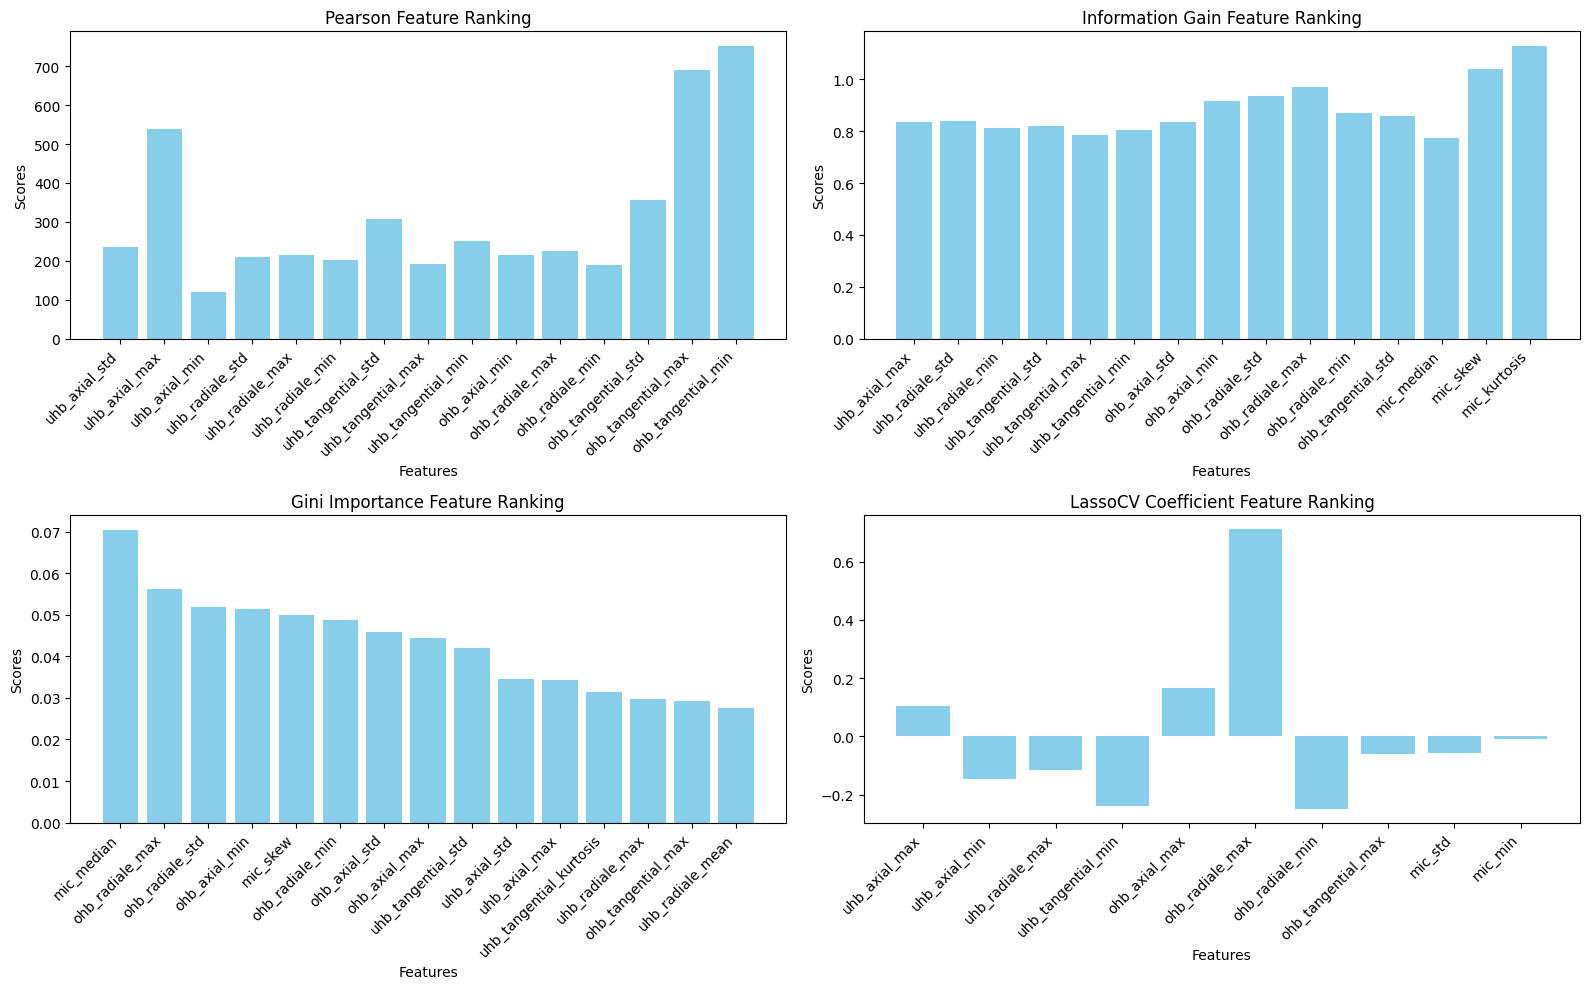

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are already defined

# Feature selection using Pearson correlation
pearson_features = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
pearson_features.fit(X, y)
pearson_selected_features = X.columns[pearson_features.get_support(indices=True)]
pearson_feature_scores = pearson_features.scores_[pearson_features.get_support(indices=True)]

# Feature selection using Information Gain
information_gain_features = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 15 features
information_gain_features.fit(X, y)
information_gain_selected_features = X.columns[information_gain_features.get_support(indices=True)]
information_gain_scores = information_gain_features.scores_[information_gain_features.get_support(indices=True)]

# Feature selection using Gini gain (Random Forest)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)
gini_selected_features = X.columns[forest.feature_importances_.argsort()[::-1][:15]]  # Select top 15 features
gini_importance_scores = forest.feature_importances_[forest.feature_importances_.argsort()[::-1][:15]]

# Feature selection using LassoCV
lasso_cv = LassoCV(cv=15)  # You can adjust the number of cross-validation folds
lasso_cv.fit(X, y)
lasso_selected_features = X.columns[SelectFromModel(lasso_cv, prefit=True, max_features=15).get_support(indices=True)]
lasso_coefficients = lasso_cv.coef_[SelectFromModel(lasso_cv, prefit=True, max_features=15).get_support(indices=True)]

# Create separate bar plots for each method
methods = ['Pearson', 'Information Gain', 'Gini Importance', 'LassoCV Coefficient']
all_selected_features = [pearson_selected_features, information_gain_selected_features, gini_selected_features, lasso_selected_features]
all_scores = [pearson_feature_scores, information_gain_scores, gini_importance_scores, lasso_coefficients]

plt.figure(figsize=(16, 10))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i + 1)
    plt.bar(range(len(all_selected_features[i])), all_scores[i][all_selected_features[i].get_indexer(all_selected_features[i])], color='skyblue')
    plt.title(f'{method} Feature Ranking')
    plt.xlabel('Features')
    plt.ylabel('Scores')
    plt.xticks(range(len(all_selected_features[i])), all_selected_features[i], rotation=45, ha='right')
    plt.tight_layout()

plt.show()

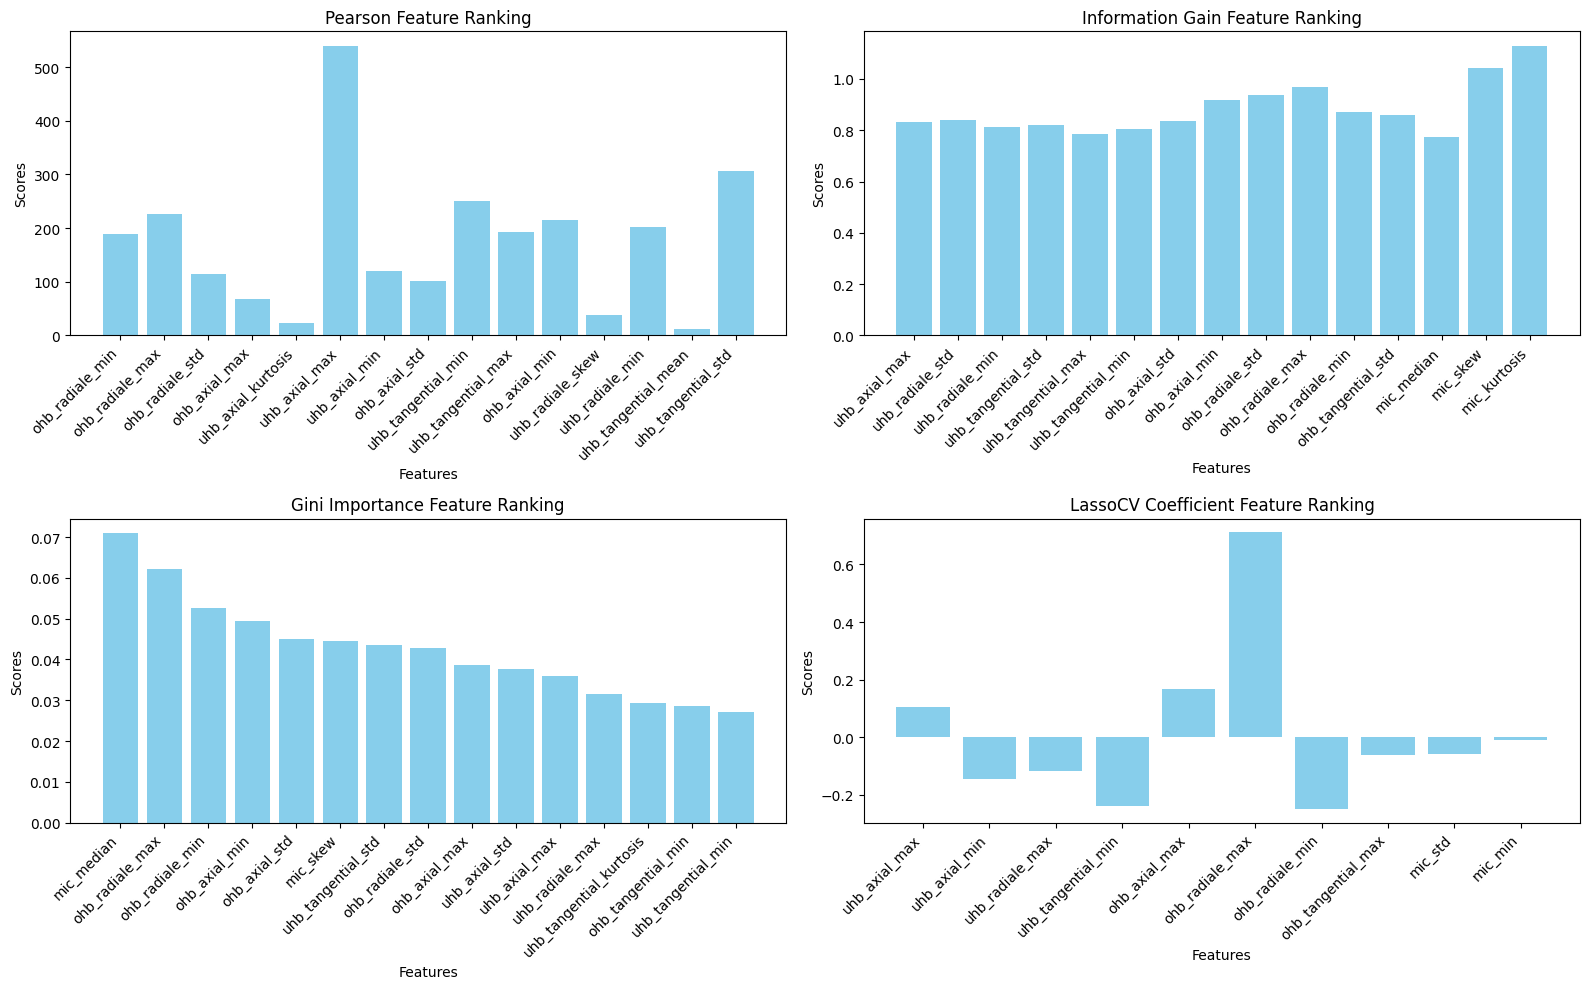

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are already defined

# Calculate Pearson correlation coefficients
pearson_correlation = X.apply(lambda x: pearsonr(x, y)[0])

# Select top features based on absolute correlation values
top_features = pearson_correlation.abs().sort_values(ascending=False).head(15).index

# Feature selection using Pearson correlation
pearson_features = SelectKBest(score_func=f_classif, k=15)
pearson_features.fit(X[top_features], y)

# Get selected features and their scores
pearson_selected_features = X[top_features].columns[pearson_features.get_support(indices=True)]
pearson_feature_scores = pearson_features.scores_[pearson_features.get_support(indices=True)]

# Feature selection using Information Gain
information_gain_features = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 15 features
information_gain_features.fit(X, y)
information_gain_selected_features = X.columns[information_gain_features.get_support(indices=True)]
information_gain_scores = information_gain_features.scores_[information_gain_features.get_support(indices=True)]

# Feature selection using Gini gain (Random Forest)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)
gini_selected_features = X.columns[forest.feature_importances_.argsort()[::-1][:15]]  # Select top 15 features
gini_importance_scores = forest.feature_importances_[forest.feature_importances_.argsort()[::-1][:15]]

# Feature selection using LassoCV
lasso_cv = LassoCV(cv=15)  # You can adjust the number of cross-validation folds
lasso_cv.fit(X, y)
lasso_selected_features = X.columns[SelectFromModel(lasso_cv, prefit=True, max_features=15).get_support(indices=True)]
lasso_coefficients = lasso_cv.coef_[SelectFromModel(lasso_cv, prefit=True, max_features=15).get_support(indices=True)]

# Create separate bar plots for each method
methods = ['Pearson', 'Information Gain', 'Gini Importance', 'LassoCV Coefficient']
all_selected_features = [pearson_selected_features, information_gain_selected_features, gini_selected_features, lasso_selected_features]
all_scores = [pearson_feature_scores, information_gain_scores, gini_importance_scores, lasso_coefficients]

plt.figure(figsize=(16, 10))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i + 1)
    plt.bar(range(len(all_selected_features[i])), all_scores[i][all_selected_features[i].get_indexer(all_selected_features[i])], color='skyblue')
    plt.title(f'{method} Feature Ranking')
    plt.xlabel('Features')
    plt.ylabel('Scores')
    plt.xticks(range(len(all_selected_features[i])), all_selected_features[i], rotation=45, ha='right')
    plt.tight_layout()

plt.show()

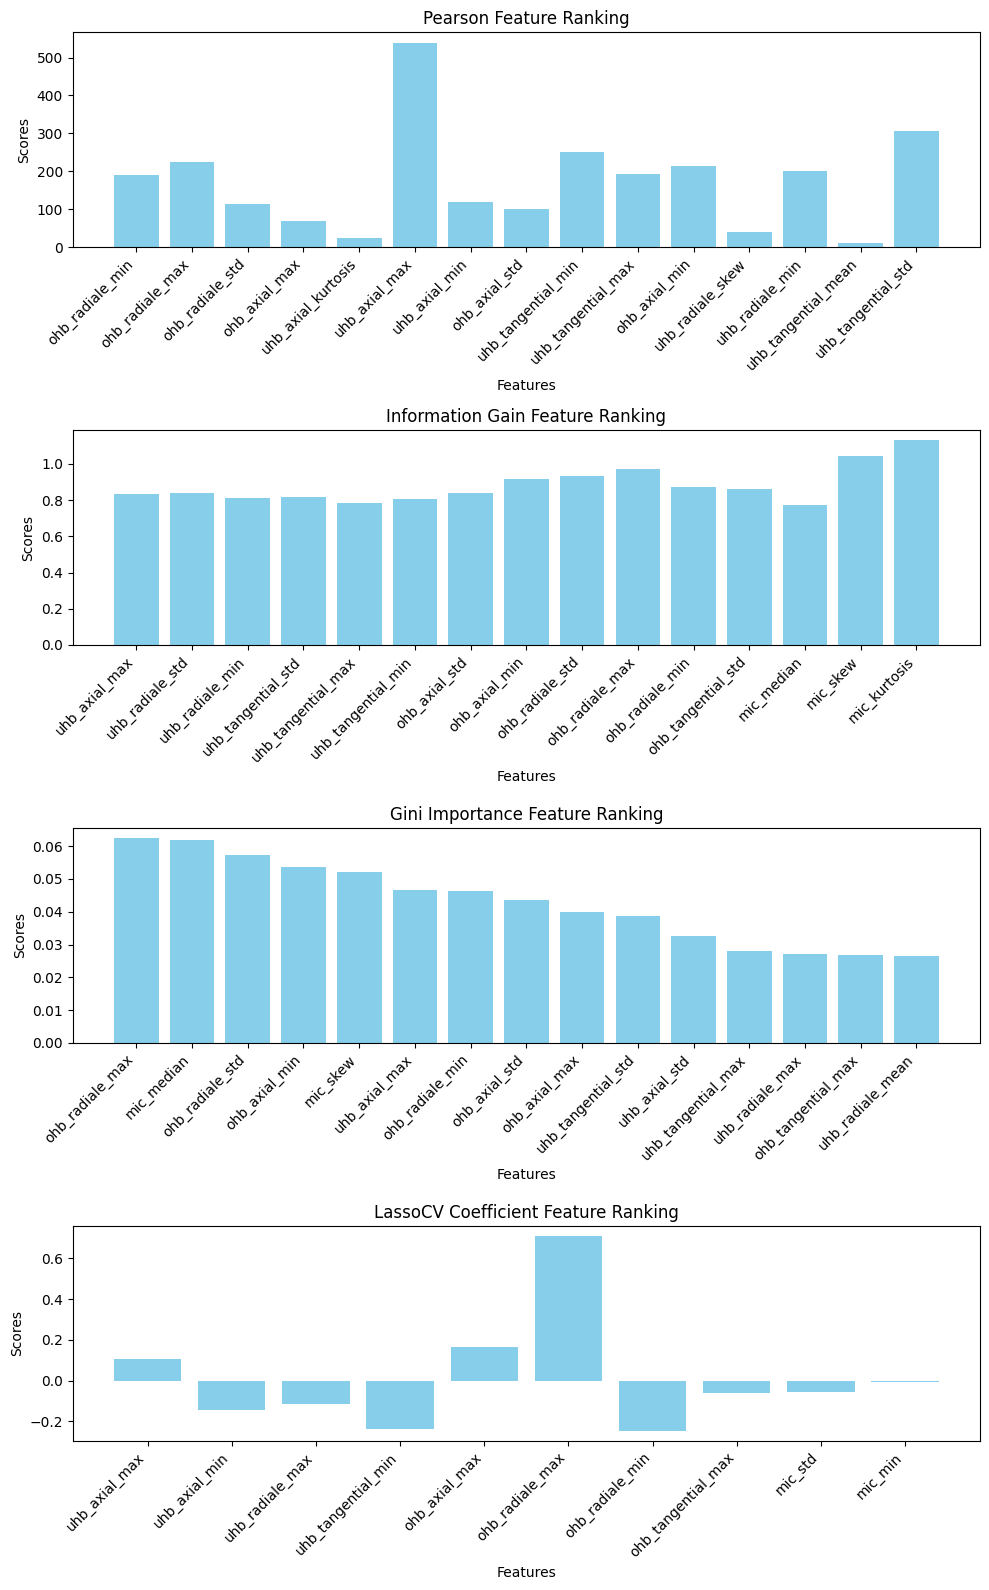

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are already defined

# Calculate Pearson correlation coefficients
pearson_correlation = X.corrwith(y)

# Select top features based on absolute correlation values
top_features = pearson_correlation.abs().sort_values(ascending=False).head(15).index

# Feature selection using Pearson correlation
pearson_features = SelectKBest(score_func=f_classif, k=15)
pearson_features.fit(X[top_features], y)

# Get selected features and their scores
pearson_selected_features = X[top_features].columns[pearson_features.get_support(indices=True)]
pearson_feature_scores = pearson_features.scores_[pearson_features.get_support(indices=True)]

# Feature selection using Information Gain
information_gain_features = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 15 features
information_gain_features.fit(X, y)
information_gain_selected_features = X.columns[information_gain_features.get_support(indices=True)]
information_gain_scores = information_gain_features.scores_[information_gain_features.get_support(indices=True)]

# Feature selection using Gini gain (Random Forest)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)
gini_selected_features = X.columns[forest.feature_importances_.argsort()[::-1][:15]]  # Select top 15 features
gini_importance_scores = forest.feature_importances_[forest.feature_importances_.argsort()[::-1][:15]]

# Feature selection using LassoCV
lasso_cv = LassoCV(cv=10)  # You can adjust the number of cross-validation folds
lasso_cv.fit(X, y)
lasso_selected_features = X.columns[SelectFromModel(lasso_cv, prefit=True, max_features=15).get_support(indices=True)]
lasso_coefficients = lasso_cv.coef_[SelectFromModel(lasso_cv, prefit=True, max_features=15).get_support(indices=True)]

# Create separate bar plots for each method
methods = ['Pearson', 'Information Gain', 'Gini Importance', 'LassoCV Coefficient']
all_selected_features = [pearson_selected_features, information_gain_selected_features, gini_selected_features, lasso_selected_features]
all_scores = [pearson_feature_scores, information_gain_scores, gini_importance_scores, lasso_coefficients]

plt.figure(figsize=(10, 16))

for i, method in enumerate(methods):
    plt.subplot(4, 1, i + 1)
    plt.bar(range(len(all_selected_features[i])), all_scores[i][all_selected_features[i].get_indexer(all_selected_features[i])], color='skyblue')
    plt.title(f'{method} Feature Ranking')
    plt.xlabel('Features')
    plt.ylabel('Scores')
    plt.xticks(range(len(all_selected_features[i])), all_selected_features[i], rotation=45, ha='right')
    plt.tight_layout()

plt.show()


In [ ]:
# Dicionário para armazenar os ranks
feature_ranks = {}

# Rank baseado nos índices ou pontos dos métodos de seleção de features.
for idx, feature in enumerate(pearson_selected_features):
    feature_ranks[feature] = idx + 1

for idx, feature in enumerate(information_gain_selected_features):
    if feature in feature_ranks:
        feature_ranks[feature] += idx + 1
    else:
        feature_ranks[feature] = idx + 1

for idx, feature in enumerate(lasso_selected_features):
    if feature in feature_ranks:
        feature_ranks[feature] += idx + 1
    else:
        feature_ranks[feature] = idx + 1

for idx, feature in enumerate(gini_selected_features):
    if feature in feature_ranks:
        feature_ranks[feature] += idx + 1
    else:
        feature_ranks[feature] = idx + 1

# Sort the features based on their ranks
sorted_features = sorted(feature_ranks, key=feature_ranks.get)

# Print the ranked features
print("Ranked Features:")
for rank, feature in enumerate(sorted_features, 1):
    print(f"Rank {rank}: {feature}")

Ranked Features:
Rank 1: uhb_radiale_std
Rank 2: uhb_axial_kurtosis
Rank 3: uhb_axial_min
Rank 4: mic_std
Rank 5: mic_min
Rank 6: uhb_axial_std
Rank 7: uhb_radiale_skew
Rank 8: ohb_tangential_std
Rank 9: uhb_tangential_kurtosis
Rank 10: uhb_tangential_mean
Rank 11: mic_median
Rank 12: ohb_radiale_std
Rank 13: uhb_tangential_max
Rank 14: mic_kurtosis
Rank 15: uhb_radiale_mean
Rank 16: uhb_radiale_min
Rank 17: uhb_radiale_max
Rank 18: ohb_axial_max
Rank 19: uhb_axial_max
Rank 20: uhb_tangential_min
Rank 21: mic_skew
Rank 22: ohb_radiale_max
Rank 23: ohb_axial_std
Rank 24: ohb_tangential_max
Rank 25: ohb_axial_min
Rank 26: ohb_radiale_min
Rank 27: uhb_tangential_std


# Seleção de features dados pyAudio
Nesta etapa, dois arquivos são carregados com features obtidas dos dados puros de vibração. Esta etapa realiza a compração de dois conjuntos de features comumente extraídas de dados de vibração em comparação com as feature da biblioteca pyAudio (avaliar outra).

Após extraídas, um processo de seleção de features é aplicado aos dois conjuntos, sendo eles: Pearson, Gini Gain, Information Gain e Lasso. Ao final, as features selecionadas serão submetidas a dois classificadores e avaliado suas caracterísitcas.

In [ ]:
# Load your CSV file into a DataFrame
data_pyaudio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/vib_pyaudio_features.csv')
data_pyaudio = shuffle(data_pyaudio)


# Separate the features and the target variable
XX = data_pyaudio.drop('class', axis=1)  # Features
yy = data_pyaudio['class']  # Target variable

In [ ]:
data_pyaudio

# Feature Selection com Pearson’s Correlation Coefficient


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Calculate Pearson correlation coefficients
pearson_correlation = XX.corrwith(yy)

# Select top features based on absolute correlation values
top_features = pearson_correlation.abs().sort_values(ascending=False).head(15).index

# Feature selection using Pearson correlation
pearson_features = SelectKBest(score_func=f_classif, k=15)
pearson_features.fit(XX[top_features], yy)

# Get selected features and their scores
pearson_selected_features = XX[top_features].columns[pearson_features.get_support(indices=True)]
pearson_feature_scores = pearson_features.scores_[pearson_features.get_support(indices=True)]

print(pearson_selected_features)

Index(['ohb_tangential_mfcc_3', 'uhb_axial_mfcc_7', 'uhb_axial_mfcc_5',
       'ohb_tangential_mfcc_6', 'uhb_radiale_mfcc_9', 'uhb_axial_mfcc_12',
       'ohb_radiale_spectral_centroid', 'uhb_radiale_mfcc_5',
       'ohb_radiale_mfcc_3', 'ohb_tangential_mfcc_12', 'uhb_radiale_mfcc_4',
       'uhb_radiale_mfcc_11', 'ohb_tangential_mfcc_7',
       'uhb_tangential_mfcc_13', 'uhb_axial_mfcc_6'],
      dtype='object')


# Feature Selection com Information Gain Ratio

In [ ]:
# 2. Feature extraction using Information Gain
information_gain_features = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 10 features
information_gain_features.fit(XX, yy)
information_gain_selected_features = XX.columns[information_gain_features.get_support(indices=True)]

print("Selected features using Information Gain:", information_gain_selected_features)


Selected features using Information Gain: Index(['uhb_axial_spectral_spread', 'uhb_axial_spectral_rolloff',
       'uhb_radiale_spectral_rolloff', 'uhb_radiale_mfcc_2',
       'uhb_tangential_spectral_spread', 'ohb_axial_mfcc_4',
       'ohb_axial_mfcc_6', 'ohb_radiale_mfcc_2', 'ohb_radiale_mfcc_4',
       'ohb_radiale_mfcc_6', 'ohb_tangential_spectral_spread',
       'ohb_tangential_spectral_rolloff', 'ohb_tangential_mfcc_2',
       'ohb_tangential_mfcc_7', 'mic_spectral_entropy'],
      dtype='object')


# Feature Selection com Gini Gain

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(XX, yy)
gini_selected_features = XX.columns[forest.feature_importances_.argsort()[::-1][:15]]  # Select top 5 features

print("Selected features using Gini gain:", gini_selected_features)

Selected features using Gini gain: Index(['ohb_tangential_mfcc_6', 'ohb_tangential_mfcc_12', 'ohb_axial_mfcc_6',
       'uhb_radiale_mfcc_7', 'ohb_axial_mfcc_2', 'ohb_tangential_mfcc_5',
       'ohb_radiale_mfcc_6', 'uhb_axial_mfcc_5', 'uhb_radiale_spectral_spread',
       'ohb_radiale_mfcc_2', 'ohb_tangential_mfcc_3', 'uhb_tangential_mfcc_2',
       'uhb_tangential_mfcc_13', 'ohb_tangential_mfcc_2', 'ohb_axial_mfcc_5'],
      dtype='object')


# Feature Selection com LassoCV

In [ ]:
# Feature selection using LassoCV
lasso_cv = LassoCV(cv=10)  # You can adjust the number of cross-validation folds
lasso_cv.fit(XX, yy)
lasso_selected_features = XX.columns[SelectFromModel(lasso_cv, prefit=True, max_features=15).get_support(indices=True)]
print("Selected features using LASSO:", lasso_selected_features[:15])

Selected features using LASSO: Index(['uhb_radiale_mfcc_4', 'uhb_radiale_mfcc_8', 'uhb_radiale_mfcc_9',
       'uhb_tangential_zcr', 'uhb_tangential_mfcc_10',
       'uhb_tangential_mfcc_13', 'ohb_axial_mfcc_8', 'ohb_axial_mfcc_12',
       'ohb_radiale_mfcc_3', 'ohb_radiale_mfcc_6', 'ohb_tangential_mfcc_3',
       'ohb_tangential_mfcc_6', 'ohb_tangential_mfcc_7',
       'ohb_tangential_mfcc_8', 'ohb_tangential_mfcc_12'],
      dtype='object')


# Rank das features selecionadas

In [ ]:
# Dicionário para armazenar os ranks
feature_ranks_pyAudio = {}

# Rank baseado nos índices ou pontos dos métodos de seleção de features.
for idx, feature in enumerate(pearson_selected_features):
    feature_ranks_pyAudio[feature] = idx + 1

for idx, feature in enumerate(information_gain_selected_features):
    if feature in feature_ranks_pyAudio:
        feature_ranks_pyAudio[feature] += idx + 1
    else:
        feature_ranks_pyAudio[feature] = idx + 1

for idx, feature in enumerate(lasso_selected_features):
    if feature in feature_ranks_pyAudio:
        feature_ranks_pyAudio[feature] += idx + 1
    else:
        feature_ranks_pyAudio[feature] = idx + 1

for idx, feature in enumerate(gini_selected_features):
    if feature in feature_ranks_pyAudio:
        feature_ranks_pyAudio[feature] += idx + 1
    else:
        feature_ranks_pyAudio[feature] = idx + 1

# Sort the features based on their ranks
sorted_features = sorted(feature_ranks_pyAudio, key=feature_ranks_pyAudio.get)

# Print the ranked features
print("Ranked Features:")
for rank, feature in enumerate(sorted_features, 1):
    print(f"Rank {rank}: {feature}")

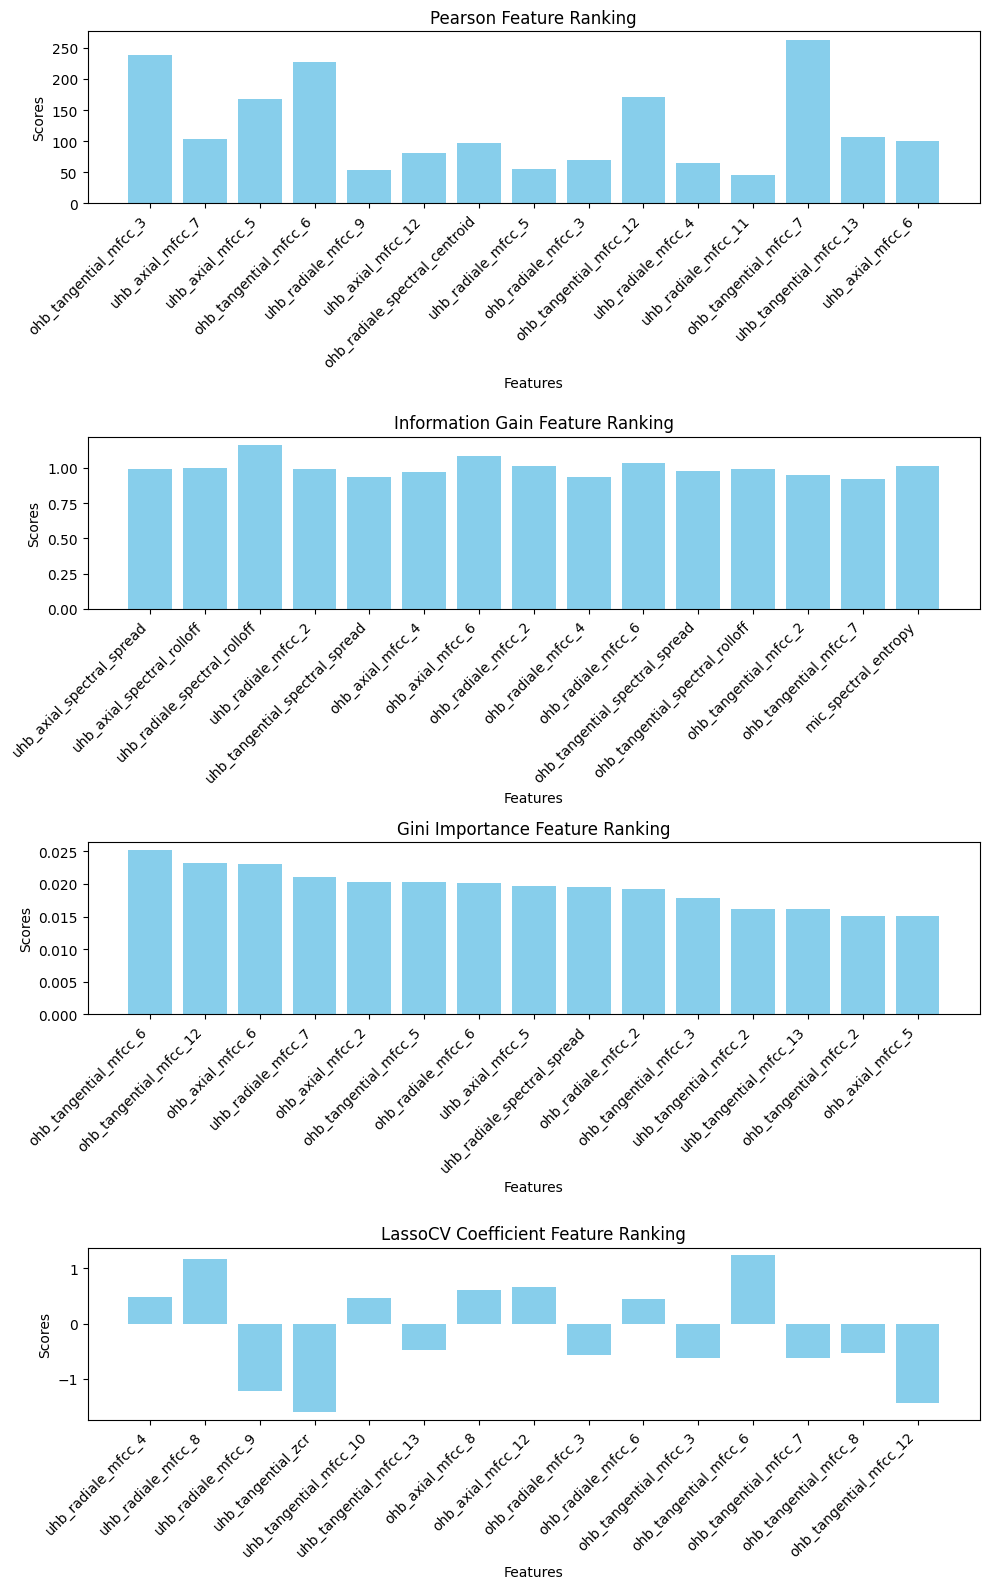

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are already defined

# Calculate Pearson correlation coefficients
pearson_correlation = XX.corrwith(yy)

# Select top features based on absolute correlation values
top_features = pearson_correlation.abs().sort_values(ascending=False).head(15).index

# Feature selection using Pearson correlation
pearson_features = SelectKBest(score_func=f_classif, k=15)
pearson_features.fit(XX[top_features], yy)

# Get selected features and their scores
pearson_selected_features = XX[top_features].columns[pearson_features.get_support(indices=True)]
pearson_feature_scores = pearson_features.scores_[pearson_features.get_support(indices=True)]

# Feature selection using Information Gain
information_gain_features = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 15 features
information_gain_features.fit(XX, yy)
information_gain_selected_features = XX.columns[information_gain_features.get_support(indices=True)]
information_gain_scores = information_gain_features.scores_[information_gain_features.get_support(indices=True)]

# Feature selection using Gini gain (Random Forest)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(XX, yy)
gini_selected_features = XX.columns[forest.feature_importances_.argsort()[::-1][:15]]  # Select top 15 features
gini_importance_scores = forest.feature_importances_[forest.feature_importances_.argsort()[::-1][:15]]

# Feature selection using LassoCV
lasso_cv = LassoCV(cv=10)  # You can adjust the number of cross-validation folds
lasso_cv.fit(XX, yy)
lasso_selected_features = XX.columns[SelectFromModel(lasso_cv, prefit=True, max_features=15).get_support(indices=True)]
lasso_coefficients = lasso_cv.coef_[SelectFromModel(lasso_cv, prefit=True, max_features=15).get_support(indices=True)]

# Create separate bar plots for each method
methods = ['Pearson', 'Information Gain', 'Gini Importance', 'LassoCV Coefficient']
all_selected_features = [pearson_selected_features, information_gain_selected_features, gini_selected_features, lasso_selected_features]
all_scores = [pearson_feature_scores, information_gain_scores, gini_importance_scores, lasso_coefficients]

plt.figure(figsize=(10, 16))

for i, method in enumerate(methods):
    plt.subplot(4, 1, i + 1)
    plt.bar(range(len(all_selected_features[i])), all_scores[i][all_selected_features[i].get_indexer(all_selected_features[i])], color='skyblue')
    plt.title(f'{method} Feature Ranking')
    plt.xlabel('Features')
    plt.ylabel('Scores')
    plt.xticks(range(len(all_selected_features[i])), all_selected_features[i], rotation=45, ha='right')
    plt.tight_layout()

plt.show()